In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()                                                                                                                                                                          
print(most_recent_date)                                                          

2017-08-23


<Axes: xlabel='Date', ylabel='mm'>

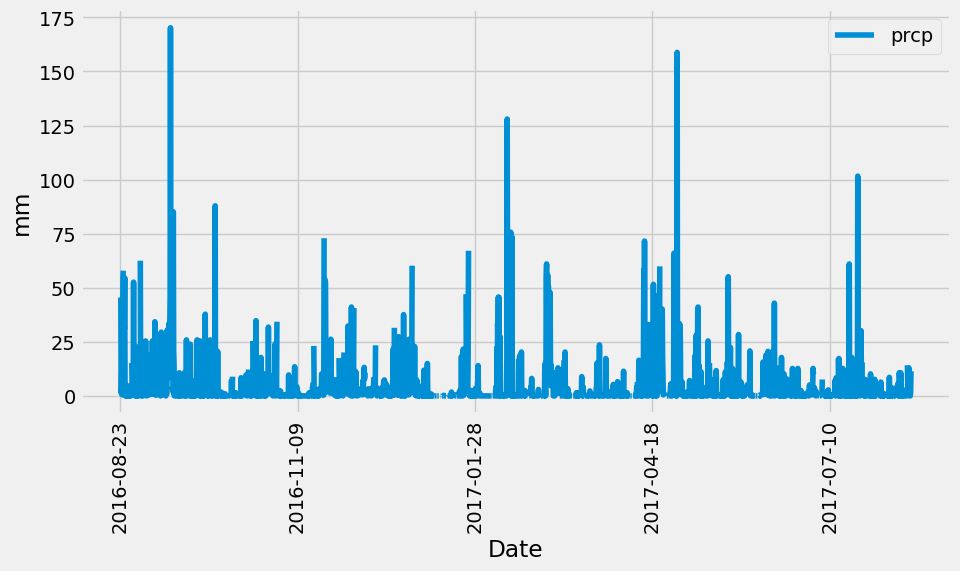

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
One_year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= One_year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
precipitation_df.set_index('date', inplace=True)


# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=90, xlabel = 'Date', ylabel='mm', figsize=(10,5))


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(desc('count')).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_ID = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(desc('count')).first()[0]


temperature = session.query(
    func.min(Measurement.tobs).label('lowest_temp'),
    func.max(Measurement.tobs).label('highest_temp'),
    func.avg(Measurement.tobs).label('average_temp')
).filter(Measurement.station == most_active_station_ID).all()

lowest_temp = temperature[0].lowest_temp
highest_temp = temperature[0].highest_temp
average_temp = temperature[0].average_temp


print(f"most active station ID:{most_active_station_ID}")
print(f"lowest temperature:{lowest_temp}")
print(f"highest temperature:{highest_temp}")
print(f"average temperature:{average_temp}")



most active station ID:USC00519281
lowest temperature:12.2
highest temperature:29.4
average temperature:22.03582251082252


Text(0.5, 0, 'Temperature')

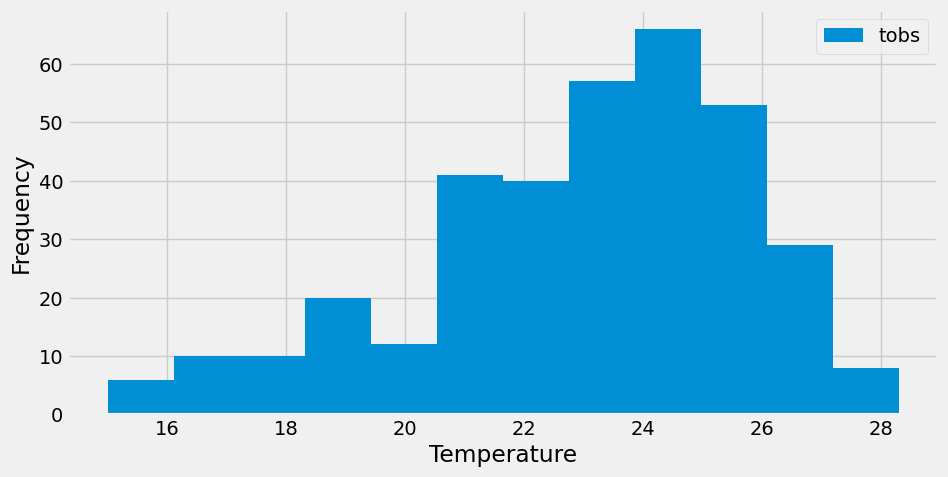

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation_data=session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >=One_year_ago_date).all()

station_df = pd.DataFrame(temperature_observation_data, columns=['tobs'])

station_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel('Temperature')




# Close Session

In [16]:
# Close Session
session.close()
